In [90]:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import statistics 

# Part I

In [91]:
import matplotlib.pyplot as plt

In [92]:
flights_df= pd.read_csv('flights.csv')
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [93]:
# Let's start by looking at some of the structural attributes of the dataset

print (flights_df.shape)   # rows and columns
print (flights_df.columns) # column names
print (flights_df.dtypes)  # data types of each column

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [94]:
# Let's look at the unique destinations of the flights in the data 

a = flights_df.dest.unique()
print(a)

# Let's now look at the top ten rows to get a sense of the data
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


#### Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc.

* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Using the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [95]:
# Filtering flights where destination equals Seattle
flights_df1=flights_df[ flights_df.dest=='SEA'] 
flights_df1.shape

(3923, 17)

 -- There are 3923 flights from NYC to Seattle -- 

(b) How many airlines fly from NYC to Seattle?

In [96]:
# Finding unique airlines that fly from NYC to Seattle
flights_df2=flights_df1.carrier.unique()
len(flights_df2)

5

 -- There are 5 airlines flying from NYC to Seattle-- 

(c) How many unique air planes fly from NYC to Seattle?

In [97]:
# Using unique again to find no. of airplanes flying from NYC to Seattle
flights_df3=flights_df1.tailnum.unique()
len(flights_df3)

936

 -- There are 936 unique airplanes flying from NYC to Seattle -- 

(d) What is the average arrival delay for flights from NC to Seattle?

In [98]:
# Finding mean of the arrival delay for flights from NYC to Seattle
delay=flights_df1.arr_delay.mean()
delay

-1.0990990990990992

 -- The average arrival delay is -1.09, i.e on average the flights arrive before time. -- 

(e) What proportion of flights to Seattle come from each NYC airport?

In [99]:
flights_df4=pd.DataFrame(flights_df1.groupby(by='origin')['origin'].count()) #Using group by to count no. of flights from each airport
flights_df4["percentage"]=(flights_df4.origin/flights_df4.origin.sum())*100 #calcultaing proportion
print(flights_df4)

        origin  percentage
origin                    
EWR       1831   46.673464
JFK       2092   53.326536


 -- 46.67% of flights fly from EWR airport while 53.33% flights fly from JFK -- 

## Question 2
Flights are often delayed. Considering the following questions to explore delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [100]:
#largest average departure delay 
df_new = pd.read_csv('flights.csv',
                 parse_dates= {"date" : ["year","month","day"]},
                keep_date_col=True) #using year, month, day columns to add a date column
df_new1=pd.DataFrame(df_new.groupby(by='date')['dep_delay'].mean()) #grouping by date and taking departure delay average
df_new1=df_new1.sort_values(by='dep_delay',ascending=False) #sorting departure delay in descending order
print(df_new1.head(1)) #highest average departure delay

#largest average arrival delay
df_new2=pd.DataFrame(df_new.groupby(by='date')['arr_delay'].mean()) #grouping by date and taking arrival delay average
df_new2=df_new2.sort_values(by='arr_delay',ascending=False) #sorting arrival delay in descending order
print(df_new2.head(1)) #highest average arrival delay


            dep_delay
date                 
2013-03-08  83.536921
            arr_delay
date                 
2013-03-08  85.862155


 -- 2013-03-08 has the largest average departure and arrival delay -- 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [101]:
#Since 2013-03-08 has both, the highest avg arrival delay and departure delay as seen above, it would be the worst day to fly out of NYC

#Here's the code to confirm it

mergeddf = pd.merge(df_new1, df_new2, on ='date') #creating a new dataframe with average arrival and departure delay columns
mergeddf['total']=mergeddf['dep_delay']+mergeddf['arr_delay'] #creating a total avg delay column
mergeddf=mergeddf.sort_values(by='total',ascending=False) #sorting it in descending order to find highest avg total delay
mergeddf.head(1)

,dep_delay,arr_delay,total
date,,,
2013-03-08,83.536921,85.862155,169.399077


 -- The worst day to fly out of NYC in 2013 was 2013-03-08 -- 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

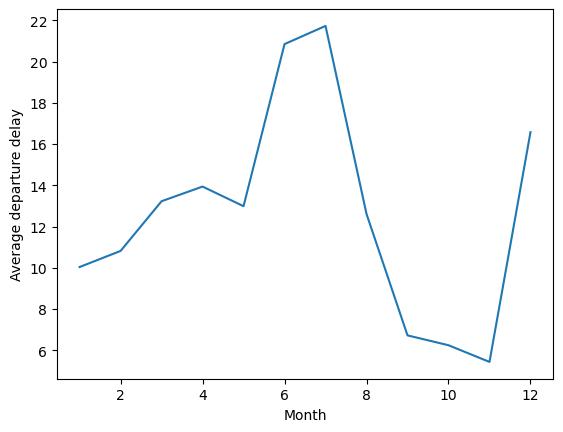

In [102]:
# Plotting departure delay vs date to look for seasonal patterns
import matplotlib.pyplot as plt
delay_month = flights_df.groupby(['month']).mean('dep_delay') #group departure delay by month
delay_month['dep_delay'].plot()
plt.xlabel('Month')
plt.ylabel('Average departure delay')
plt.show()

 -- Departure delay increases from April to June and again increases from October to December -- 

(d) On average, how do departure delays vary over the course of a day?

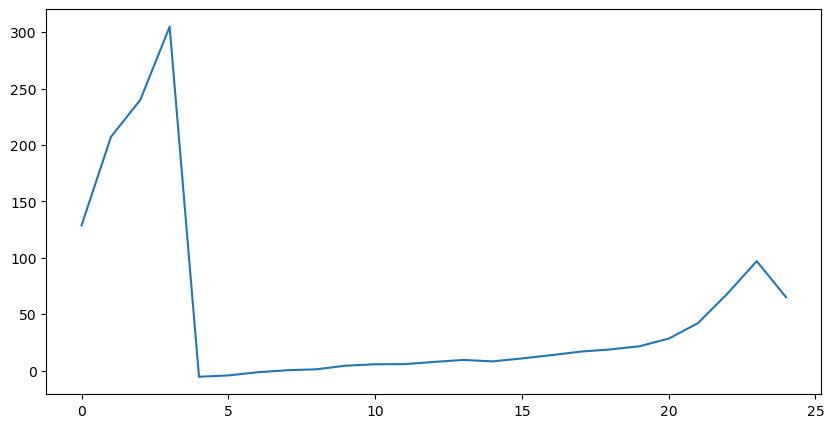

In [103]:
# Your code here
df_day=pd.DataFrame(flights_df.groupby('hour')['dep_delay'].mean()) #grouping avg departure delays by hour
df_day.reset_index(inplace=True)
fig=plt.figure()
plt.plot(df_day['hour'],df_day['dep_delay'])
fig.set_size_inches(10, 5, forward=True)

 -- The departure delay increases and reaches a peak at 3 am for it to fall sharply by 4 am. It increases slowly till 8 pm throughout the day and then shoots up a little after 10pm then falls again after 11pm. -- 

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [104]:
flights_df['speed']=flights_df['distance']/flights_df['air_time'] #storing speed = distance/air_time as a new column
flights_df[flights_df['speed']==flights_df['speed'].max()] #finding max speed

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077


 -- Flight no. 1499 flew the fastest. -- 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [105]:
df_count = df_new.groupby(['carrier','flight','dest'])["date"].count().reset_index(name="count") #grouping by carrier+flight+dest and counting the occurences based on date
df_count.query("count == 365",inplace=True) #if count =365, the flight flew everyday
print(len(df_count.index))
print(df_count['dest'].unique())

18
['SFO' 'LAX' 'SJU' 'MIA' 'CLT' 'BUR' 'FLL' 'SRQ' 'MCO' 'TPA' 'IAD' 'HNL'
 'LAS']


 -- There are 18 flights that happen everyday. They fly to the places listed above -- 

## Question 5
Which airline should you take and from which airport for minimum delay?


                dep_delay
carrier origin           
9E      EWR      5.951667
        JFK     19.001517
        LGA      8.894182
AA      EWR     10.035419
        JFK     10.302155


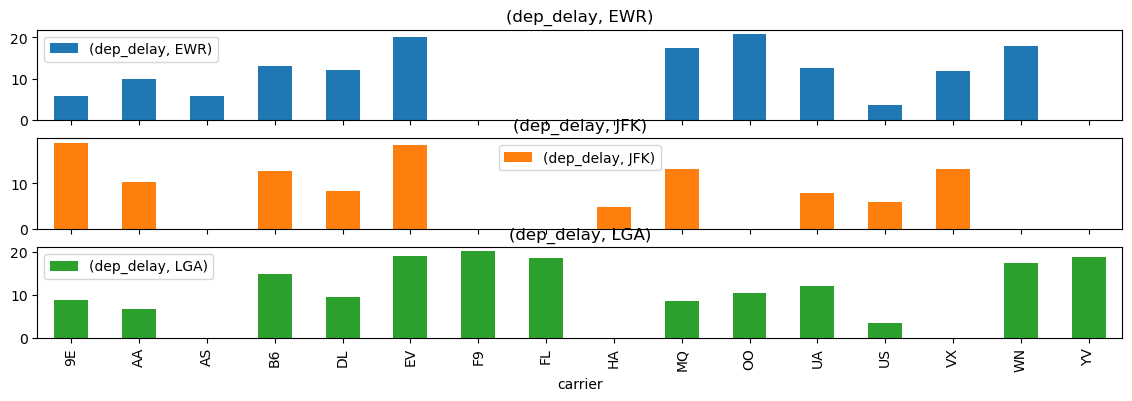

In [106]:
df_carrier=pd.DataFrame(flights_df.groupby(['carrier','origin'])['dep_delay'].mean()) #grouping by carrier and origin and storing abg delay
print(df_carrier.head())  

df_carrier=df_carrier.reset_index() #resetting index for plotting

table = pd.pivot_table(df_carrier, values=['dep_delay'], index=['carrier'], columns=['origin'], aggfunc=np.sum).fillna(0)
#pivoting the dataframe to visualize 3 plots for the different airports
plot=table.plot.bar(figsize=(14, 4), subplots=True)
df_table=pd.DataFrame(table)

 -- Here we will be ignoring 0 delay since we have replaced NA with 0. The minimum delay at EWR airport is by US airline. The abg minumum delay at JFK is by HA airline. The minimum delay at LGA is by US airline  --

## Question 6
What weather conditions are associated with flight delays leaving NYC?

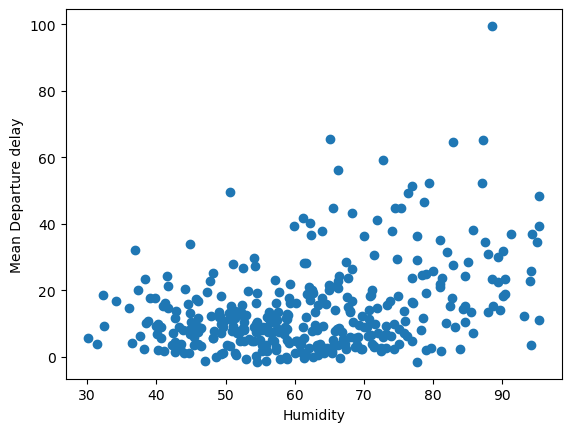

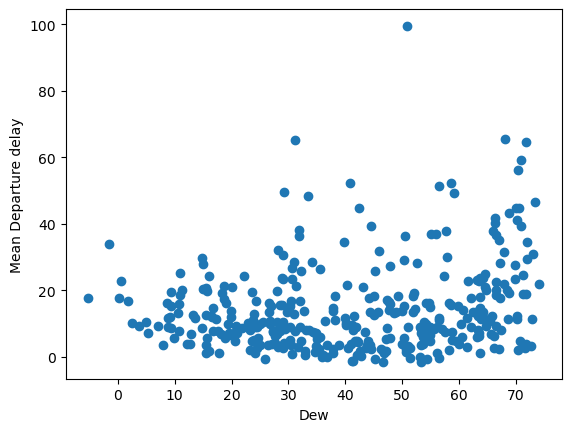

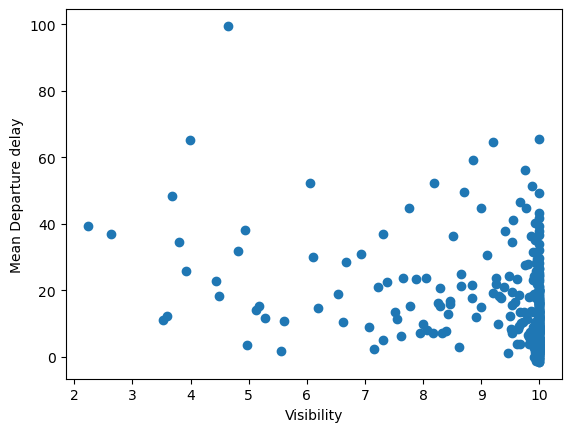

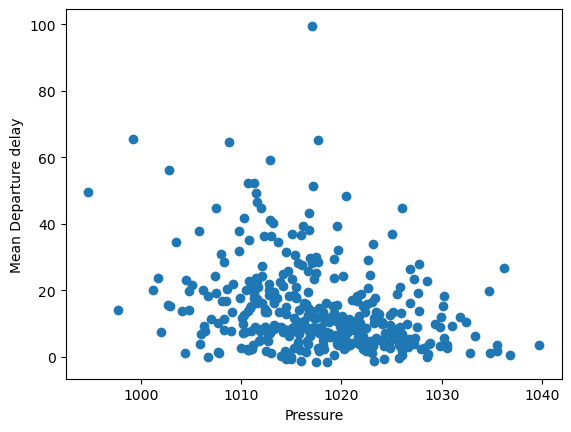

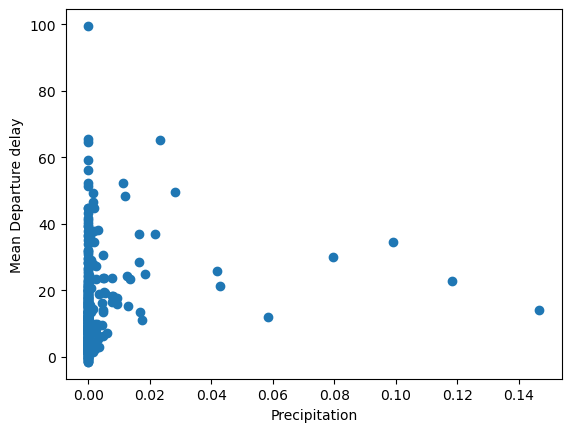

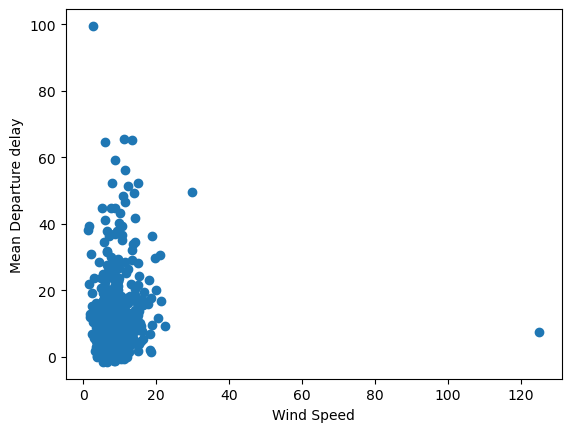

In [107]:
weather = pd.read_csv('./weather.csv',
                 parse_dates= {"date" : ["year","month","day"]},
                keep_date_col=True) #using year, month, day columns to add a date column
weather = weather.dropna()
weather['day'] = weather['day'].astype(np.int64)
weather['month'] = weather['month'].astype(np.int64) #converting float to int
weather.date=pd.to_datetime(weather[['year', 'month', 'day']])

merged_df = pd.merge(weather,df_new, on = ['origin','date','hour']) #joining dataframes on origin, date, hour

agg_merged_df = merged_df.groupby(['date'],as_index = False).agg({'dep_delay':'mean','temp':'mean','humid':'mean','visib':'mean','dewp':'mean','wind_dir':'mean','wind_speed':'mean','wind_gust':'mean','precip':'mean','pressure':'mean'})
#grouping by date and taking mean of weather conditions 

plt.scatter(agg_merged_df['humid'],agg_merged_df['dep_delay'])
plt.xlabel('Humidity')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(agg_merged_df['dewp'], agg_merged_df['dep_delay'])
plt.xlabel('Dew')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()


plt.scatter(agg_merged_df['visib'], agg_merged_df['dep_delay'])
plt.xlabel('Visibility')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

# There is a negative correlation, lower the pressure, higher the delay. 
plt.scatter(agg_merged_df['pressure'], agg_merged_df['dep_delay'])
plt.xlabel('Pressure') 
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(agg_merged_df['precip'], agg_merged_df['dep_delay'])
plt.xlabel('Precipitation')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()

plt.scatter(agg_merged_df['wind_speed'], agg_merged_df['dep_delay'])
plt.xlabel('Wind Speed')
plt.ylabel('Mean Departure delay')
plt.show()
plt.close()


# Part II
Applying cross-validation with a simple linear regression and k-Nearest Neighbors problem, and then compare the methods.  

In [108]:
import seaborn as sns
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.neighbors import KNeighborsRegressor # for kNN
from sklearn import preprocessing # for scaling the data
from sklearn.model_selection import KFold, cross_validate # for Cross-validation
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(371)

#### Read the data


In [109]:
df = pd.read_csv('./lab1_data.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,694,5.94,3.55,42.64,36
1,Quest,Azamara,6,30.277,694,5.94,3.55,42.64,36
2,Celebration,Carnival,26,47.262,1486,7.22,7.43,31.80,67
3,Conquest,Carnival,11,110.000,2974,9.53,14.88,36.99,191
4,Destiny,Carnival,17,101.353,2642,8.92,13.21,38.36,100


#### Exploring the data


In [110]:
# pick some columns for our practice
cols = ["Tonnage", "length", "cabins", "crew", "passengers"]

df_selected = df[cols]

df_selected.describe()

,Tonnage,length,cabins,crew,passengers
count,158.000000,158.000000,158.000000,158.000000,158.000000
mean,71.284671,8.130633,8.830000,78.012658,1845.740506
std,37.229540,1.793474,4.471417,35.020283,967.709478
min,2.329000,2.790000,0.330000,6.000000,66.000000
25%,46.013000,7.100000,6.132500,55.250000,1253.500000
50%,71.899000,8.555000,9.570000,81.500000,1950.000000
75%,90.772500,9.510000,10.885000,100.000000,2484.500000
max,220.000000,11.820000,27.000000,210.000000,5400.000000


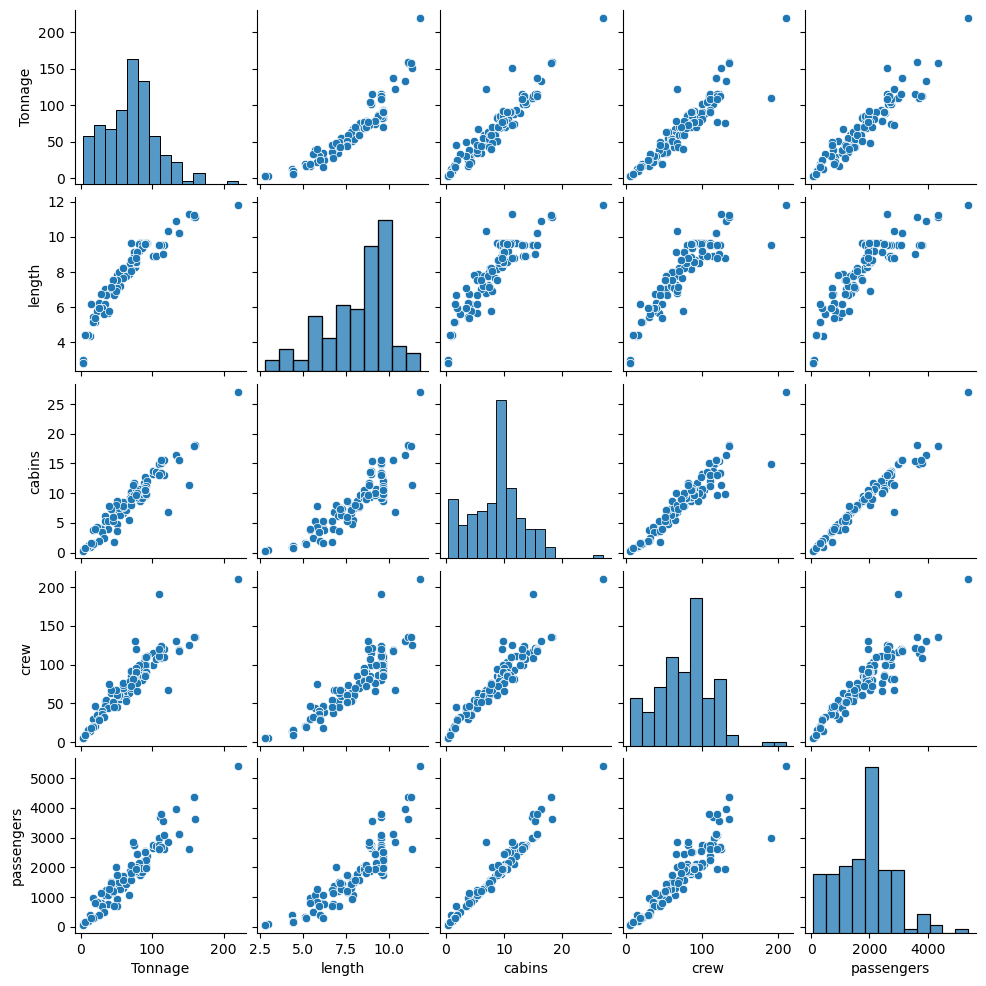

In [111]:
sns.pairplot(df_selected, height=2.0)

There seems to be a positive correlation between the 4 variables 


## Preparing the data for using cross validation


In [112]:
x_cols = ["Tonnage", "length", "cabins", "crew"]
y_col = "passengers"

X_full = df_selected[x_cols]
y_full = df_selected[y_col]

In [113]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=371) # random state ensures reproducable output across multiple function calls

In [114]:
for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    print(X_train.shape, X_test.shape)

(126, 4) (32, 4)
(126, 4) (32, 4)
(126, 4) (32, 4)
(127, 4) (31, 4)
(127, 4) (31, 4)


## Comparing LR and KNN (k=3)


In [115]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)

## Training linear regression model


In [116]:
# 2 types of error
r2_lr_list = []
mse_lr_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # linear regression
    m_lr = lr.fit(X_train, y_train)
    y_pred = m_lr.predict(X_test)
    
    # R^2
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    r2_lr_list.append(r2_lr)
    
    # mean squared error
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_lr_list.append(mse_lr)

print("average R2 score for linear regression:", np.mean(r2_lr_list))
print("average MSE linear regression:", np.mean(mse_lr_list))

average R2 score for linear regression: 0.9480419620768963
average MSE linear regression: 41375.769664874286


## Training a KNN model (K=3)


In [117]:
r2_knn_list = []
mse_knn_list = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    # KNN k=3
    m_knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # R^2
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    r2_knn_list.append(r2_knn)
    
    # mean squared error
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_knn_list.append(mse_knn)

print("average R2 score for knn:", np.mean(r2_knn_list))
print("average MSE knn:", np.mean(mse_knn_list))

# Liner Regression model has a higher R square and a lower MSE compared to KNN model, therefore Linear Regression works better.

average R2 score for knn: 0.8844743932435826
average MSE knn: 104455.40707885305


## A short-cut to do cross-validation

List of available metrics found in scikit learn documentation: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [118]:
metrics = ('r2', 'neg_mean_squared_error')

results_lr = cross_validate(estimator=lr, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
results_knn = cross_validate(estimator=knn, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)

In [119]:
results_lr

{'fit_time': array([0.00542712, 0.00379491, 0.00355506, 0.00250793, 0.0022521 ]),
 'score_time': array([0.00208902, 0.00212717, 0.00150299, 0.00147891, 0.00141382]),
 'test_r2': array([0.97581596, 0.9508146 , 0.96105864, 0.87857793, 0.97394268]),
 'train_r2': array([0.95334727, 0.96172013, 0.96041017, 0.97190647, 0.95634131]),
 'test_neg_mean_squared_error': array([-33643.29805604, -31760.63421478, -33538.33128831, -86406.84704642,
        -21529.73771883]),
 'train_neg_mean_squared_error': array([-37477.03868869, -38280.1317768 , -37520.51317443, -27045.66461286,
        -40418.56065386])}

In [120]:
print("average R2 score for LR:", results_lr["test_r2"].mean())
print("average R2 score KNN:", results_knn["test_r2"].mean())

print("average MSE linear regression:", results_lr["test_neg_mean_squared_error"].mean())
print("average MSE for KNN:", results_knn["test_neg_mean_squared_error"].mean())

average R2 score for LR: 0.9480419620768963
average R2 score KNN: 0.8844743932435826
average MSE linear regression: -41375.769664874286
average MSE for KNN: -104455.40707885305


In [121]:
df_results = pd.DataFrame({'k':[], 'train_error':[], 'test_error':[]})

for k in range(1,20):
    knn_i = KNeighborsRegressor(n_neighbors=k)
    results_knn_i = cross_validate(estimator=knn_i, X = X_full, y = y_full, cv = cv_split, scoring = metrics, return_train_score=True)
    result = pd.DataFrame({'k': k, 
                                    'train_error': results_knn_i['train_neg_mean_squared_error'].mean() * -1, 
                                    'test_error': results_knn_i['test_neg_mean_squared_error'].mean() * -1}, index=[0])
    df_results = pd.concat([df_results, result])

df_results

,k,train_error,test_error
0,1.0,0.707662,97386.466734
0,2.0,28913.530727,96072.199244
0,3.0,49546.975078,104455.407079
0,4.0,62332.373654,113585.888445
0,5.0,72862.633856,118121.459669
0,6.0,80881.137901,121470.921360
0,7.0,84954.388989,118872.146079
0,8.0,88831.092269,123161.196072
0,9.0,90639.171844,116838.024111
0,10.0,94161.930059,114674.361974


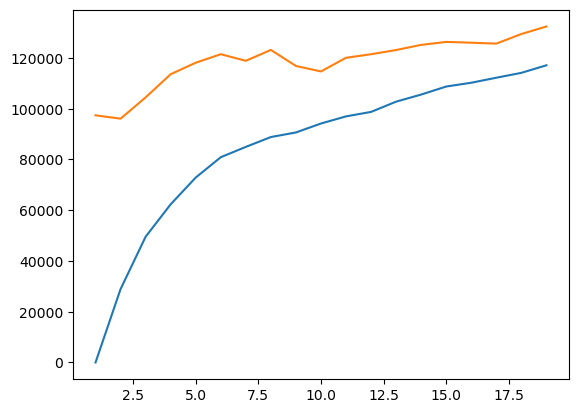

In [122]:
plt.plot(df_results['k'], df_results['train_error'])
plt.plot(df_results['k'], df_results['test_error'])

In [123]:
scaler = preprocessing.StandardScaler()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

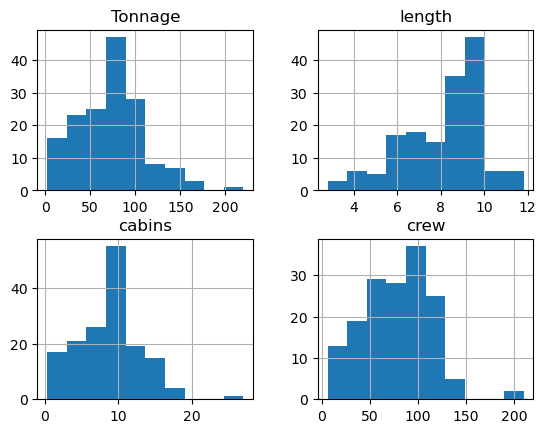

In [124]:
X_full.hist()

array([[<AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'crew'}>]], dtype=object)

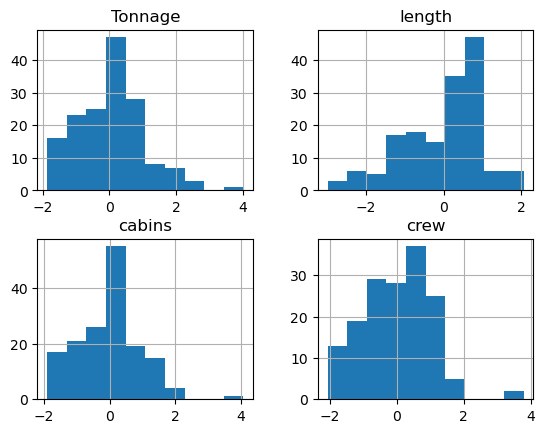

In [125]:
X_full_transform = scaler.fit(X_full).transform(X_full)
# same results:
# X_full_transform = scaler.fit_transform(X_full)

X_full_transform = pd.DataFrame(X_full_transform, columns=X_full.columns)
X_full_transform.hist()

In [126]:
r2_lr_list_scale = []
mse_lr_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # linear regression
    m_lr = lr.fit(X_train_standard, y_train)
    y_pred = m_lr.predict(X_test_standard)
    r2_lr = r2_score(y_true=y_test, y_pred=y_pred)
    mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_lr_list_scale.append(r2_lr)
    mse_lr_list_scale.append(mse_lr)
print("average R2 score:", np.mean(r2_lr_list_scale))
print("average MSE:", np.mean(mse_lr_list_scale))

print("average R2 score:", np.mean(r2_lr_list))
print("average MSE:", np.mean(mse_lr_list))

average R2 score: 0.9480419620768963
average MSE: 41375.769664874264
average R2 score: 0.9480419620768963
average MSE: 41375.769664874286




There's no change in the linear regression model after scaling. Scaling does not affect the statistical inference in regression models because the estimates are adjusted appropriately and the R square and MSE will remain the same.

## Training a KNN (K=3) model with the scaling.


In [127]:
r2_knn_list_scale = []
mse_knn_list_scale = []

for idx_train, idx_test in cv_split.split(X_full, y_full):
    X_train = X_full.iloc[idx_train]
    X_test = X_full.iloc[idx_test]
    y_train = y_full.iloc[idx_train]
    y_test = y_full.iloc[idx_test]
    
    scaler_standard = scaler.fit(X_train)
    X_train_standard = scaler_standard.transform(X_train)
    X_test_standard = scaler_standard.transform(X_test)
    
    # KNN
    m_knn = knn.fit(X_train_standard, y_train)
    y_pred = m_knn.predict(X_test_standard)
    r2_knn = r2_score(y_true=y_test, y_pred=y_pred)
    mse_knn = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    r2_knn_list_scale.append(r2_knn)
    mse_knn_list_scale.append(mse_knn)
print("average R2 score:", np.mean(r2_knn_list_scale))
print("average MSE:", np.mean(mse_knn_list_scale))

print("average R2 score:", np.mean(r2_knn_list))
print("average MSE:", np.mean(mse_knn_list))


average R2 score: 0.92885355932448
average MSE: 69669.86742831541
average R2 score: 0.8844743932435826
average MSE: 104455.40707885305


KNN model performs better after scaling.R square increased whereas the MSE error decreased. This happens because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes.